<a href="https://colab.research.google.com/github/sayma-code/Computer-Vision/blob/main/Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

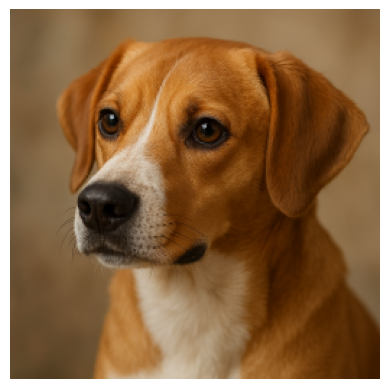

(256, 256, 3)


In [ ]:
import cv2
from matplotlib import pyplot as plt
img_rgb = cv2.imread('Example-256.png', cv2.IMREAD_COLOR_RGB)
plt.imshow(img_rgb)
plt.axis("off")
plt.show()
print(img_rgb.shape)

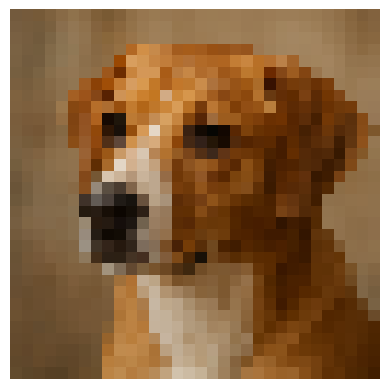

In [ ]:
import numpy as np
img_rgb_32 = np.zeros(shape=(32, 32, 3), dtype=np.uint8)
for j in range(0, 32):
  for i in range(0, 32):
    for c in range(0, 3):
      img_rgb_32[i,j,c] = img_rgb[i*8 , j*8 , c]
plt.imshow(img_rgb_32)
plt.axis("off")
plt.show()

(128, 128, 3)


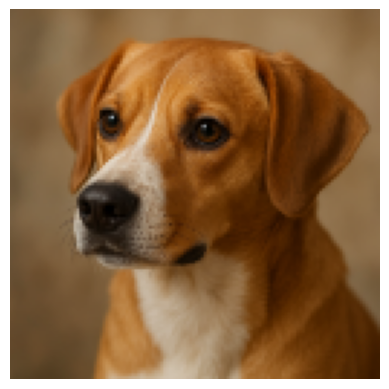

(128, 128, 3)


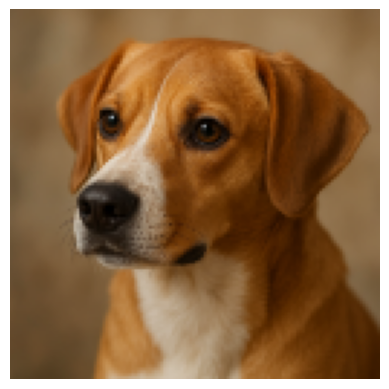

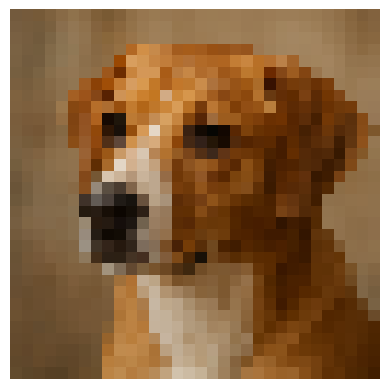

In [ ]:
import numpy as np

def downsample_by_two (img_in):
  h_input, w_input, c_input = img_in.shape
  img_lr = np.zeros(shape=(h_input//2, w_input//2, c_input), dtype=np.uint8)
  for j in range(0, h_input//2):
    for i in range(0, w_input//2):
      for c in range(0, c_input):
        pixel1 = img_in[i*2, j*2, c].astype(np.uint32)
        pixel2 = img_in[i*2+1, j*2, c].astype(np.uint32)
        pixel3 = img_in[i*2, j*2+1, c].astype(np.uint32)
        pixel4 = img_in[i*2+1, j*2+1, c].astype(np.uint32)
        sum = (pixel1+ pixel2 +pixel3+ pixel3)//4
        img_lr[i,j,c] = sum.astype(np.uint8)
  return img_lr

img_rgb_128 = downsample_by_two(img_rgb)
print(img_rgb_128.shape)
plt.imshow(img_rgb_128)
plt.axis("off")
plt.show()

img_rgb_64 = downsample_by_two(img_rgb_128)
print(img_rgb_128.shape)
plt.imshow(img_rgb_128)
plt.axis("off")
plt.show()

plt.imshow(img_rgb_32)
plt.axis("off")
plt.show()

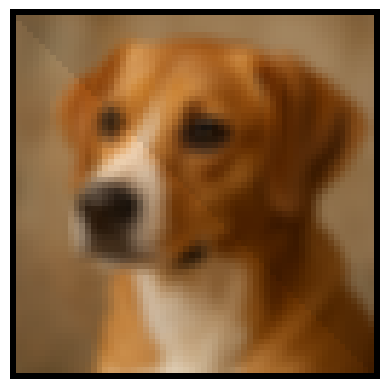

In [ ]:
def conv2 (img_in, filter):
  h, w, c = img_in.shape
  img_out = np.zeros(shape=(h, w, c), dtype=np.uint8)
  for c in range(0, 3):
    for j in range(1, h-1):
      for i in range(1, w-1):
       sumpx = img_out[i,j,c]
       for k in range(0,3):
        for l in range(0,3):
          origpx = img_in[j - (k - 1), i - (l - 1), c].astype(np.uint32)
          filtered = origpx * filter[c, k, l]  # notice axis order!
          sumpx = sumpx + filtered
        img_out[j, i, c] = (sumpx // 9).astype(np.uint8)  # + 128
  return img_out.astype(np.uint8)

# img_bgr = cv2.imread('Example-256.png', cv2.IMREAD_COLOR)
# img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# vertical sobel
# filter2D = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# horizontal sobel
# filter2D = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# box filter
filter2D = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

filter3D = np.array([filter2D, filter2D, filter2D])

filtered_img = conv2(img_rgb_64, filter3D.astype(np.uint32))

plt.imshow(filtered_img)
plt.axis("off")
plt.show()

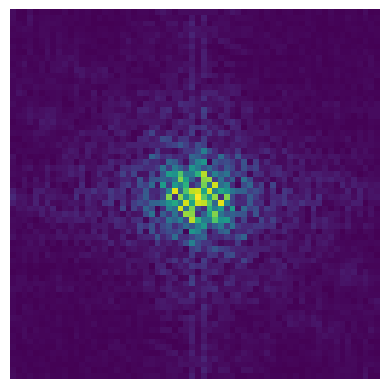

In [ ]:
f_dog = np.fft.fftshift(np.fft.fft2(img_rgb_64[:,:,0].astype(float))) / 64
plt.imshow(np.abs(f_dog).astype(np.uint8))
plt.axis("off")
plt.show()

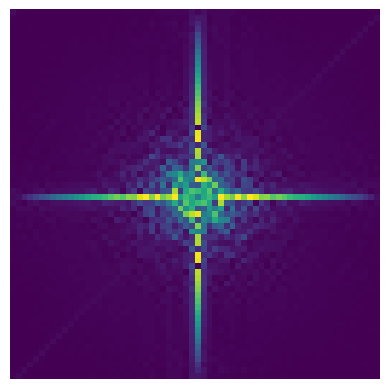

In [ ]:
f_dog = np.fft.fftshift(np.fft.fft2(filtered_img[:,:,0].astype(float))) / 64
plt.imshow(np.abs(f_dog).astype(np.uint8))
plt.axis("off")
plt.show()

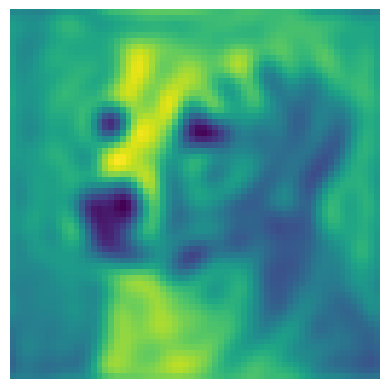

In [ ]:
f_dog = np.fft.fftshift(np.fft.fft2(img_rgb_64[:, :, 0].astype(float)))
mask = cv2.imread('mask64.png', cv2.IMREAD_COLOR)[:, :, 0].astype(float)
f_dog_lp = np.multiply(f_dog, mask)
dog_lp = np.fft.ifft2(np.fft.fftshift(f_dog_lp))

plt.imshow(np.abs(dog_lp).astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.show()